**Homework 6**

1. Given a set of blue points, calculate the parameters of the fitted quadratic curve using the gradient descent method.

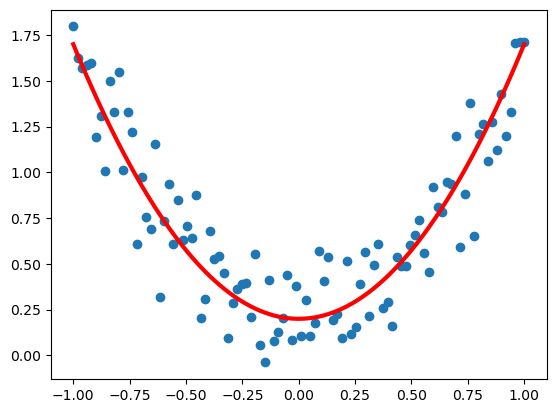

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 100)
y = 1.5*x*x + 0.2 + 0.2*np.random.randn(100)
plt.scatter(x, y)
plt.plot(x, 1.5*x*x + 0.2, 'r-', lw=3)
plt.show()

In [3]:
# Gradient descent parameters
alpha = 0.1  # learning rate
iterations = 1000  # number of iterations
n = float(len(y))  # number of data points

# Initial guess for the parameters a, b, c in the quadratic function y = ax^2 + bx + c
a_current = 0
b_current = 0
c_current = 0

# Gradient Descent Algorithm
for i in range(iterations):
    y_current = a_current*x*x + b_current*x + c_current
    cost = sum([data**2 for data in (y-y_current)]) / n
    a_gradient = -(2/n) * sum(x*x * (y - y_current))
    b_gradient = -(2/n) * sum(x * (y - y_current))
    c_gradient = -(2/n) * sum(y - y_current)
    a_current = a_current - alpha * a_gradient
    b_current = b_current - alpha * b_gradient
    c_current = c_current - alpha * c_gradient

# Final parameters
a_final = a_current
b_final = b_current
c_final = c_current

a_final, b_final, c_final

(1.4418650642221722, -0.04197687350104119, 0.22994788254791151)

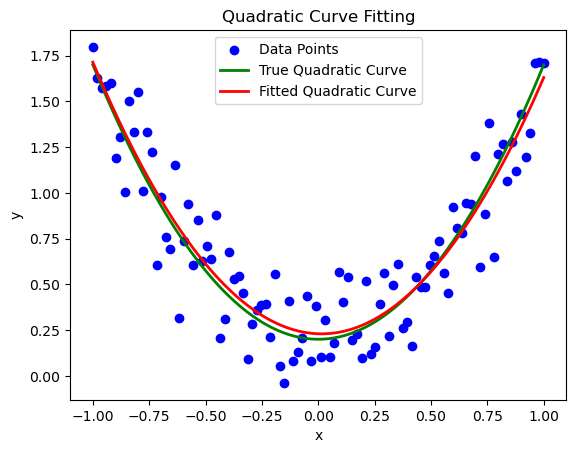

In [4]:
# Plotting the original data points, the true quadratic curve, and the fitted quadratic curve
plt.scatter(x, y, color='blue', label='Data Points')  # Original data points
true_y = 1.5*x*x + 0.2  # True quadratic curve
plt.plot(x, true_y, 'g-', lw=2, label='True Quadratic Curve')  # Plotting true quadratic curve
fitted_y = a_final*x*x + b_final*x + c_final  # Fitted quadratic curve
plt.plot(x, fitted_y, 'r-', lw=2, label='Fitted Quadratic Curve')  # Plotting fitted quadratic curve

# Plot settings
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Curve Fitting')
plt.legend()
plt.show()

2. Fill in the blank codes.

In [10]:
%matplotlib inline
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())     

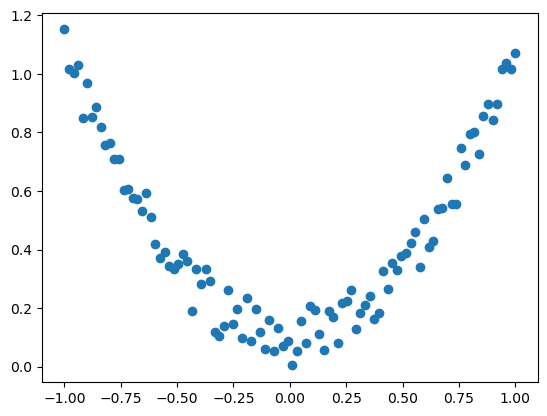

In [11]:
plt.scatter(x.numpy(), y.numpy())

搭建两层含有bias的全连接网络，隐藏层输出个数为20，激活函数都用sigmoid()

In [15]:
# Define the neural network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)  # Input layer to hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)  # Hidden layer to output layer

    def forward(self, x):
        x = F.sigmoid(self.hidden(x))  # Apply sigmoid activation function
        x = self.predict(x)  # Apply sigmoid activation function
        return x

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)


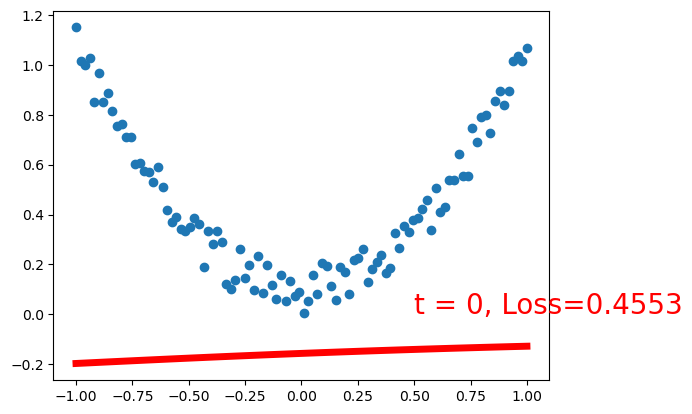

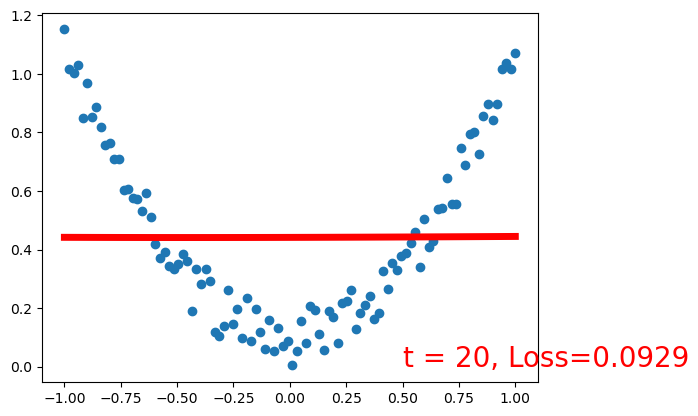

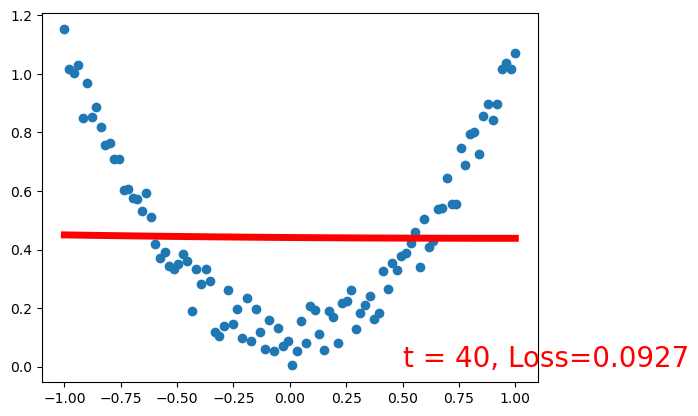

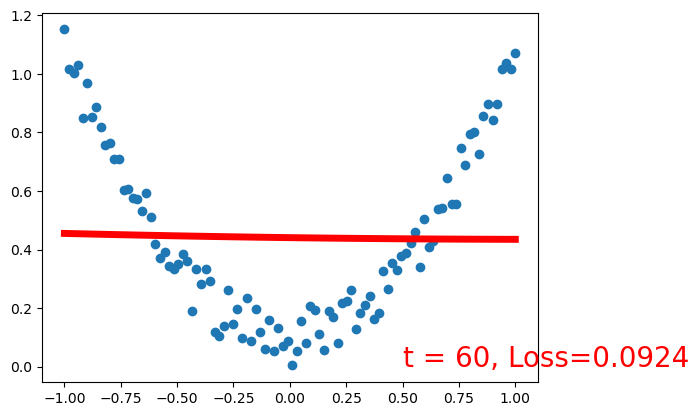

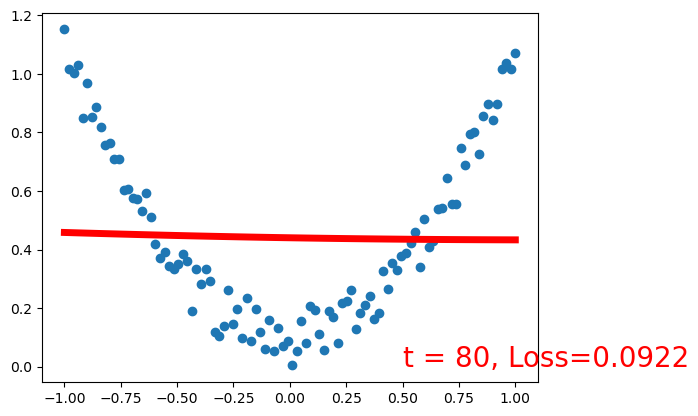

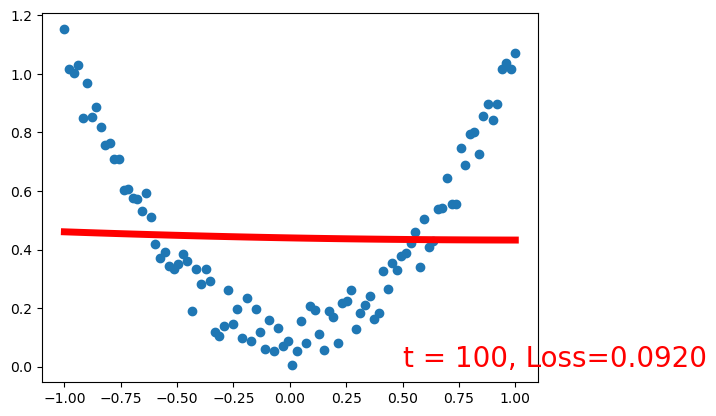

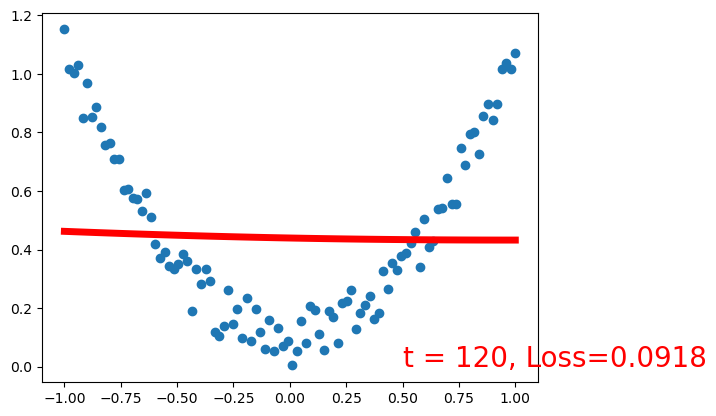

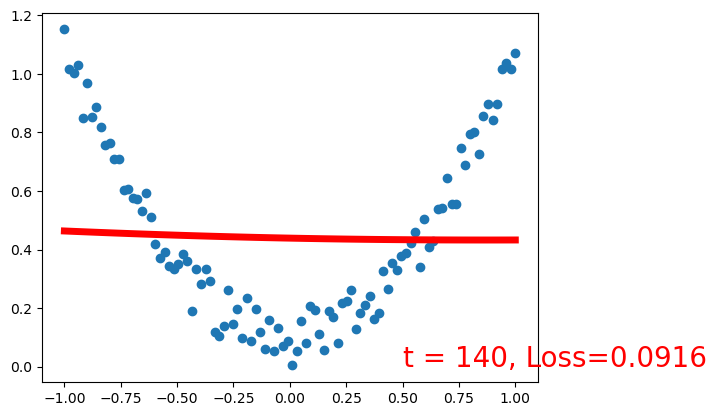

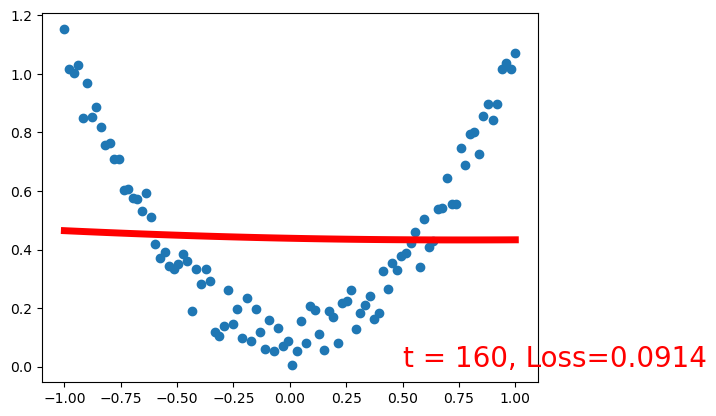

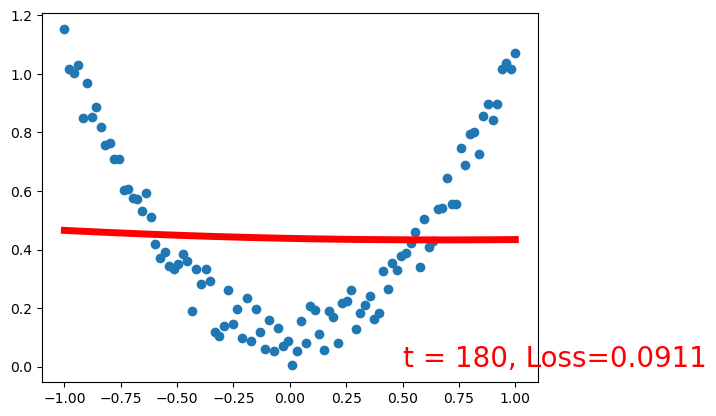

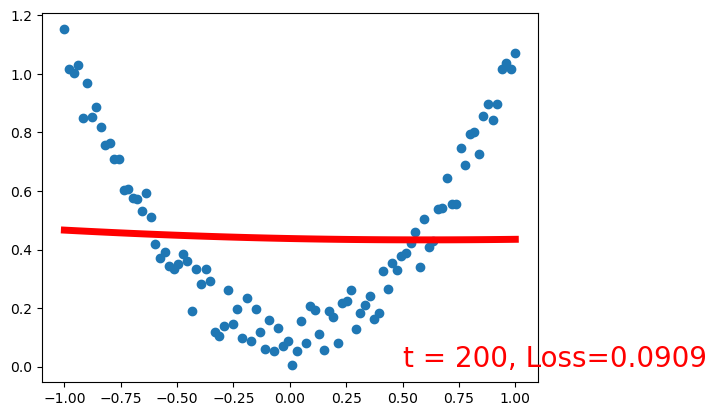

In [18]:
net = Net(n_feature=1, n_hidden=20, n_output=1)     # define the network
print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(201):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 20 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 't = %d, Loss=%.4f' % (t, loss.data.numpy()), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        plt.show()

plt.ioff()
# plt.show()

Try to use the relu function to replace the sigmoid function in the code as in the previous exercise.

In [19]:
# Define the neural network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # Input layer to hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # Hidden layer to output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))  # Apply relu function
        x = self.predict(x) 
        return x

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)


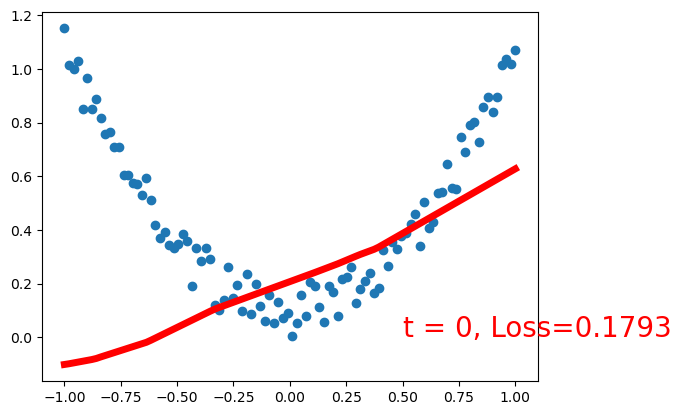

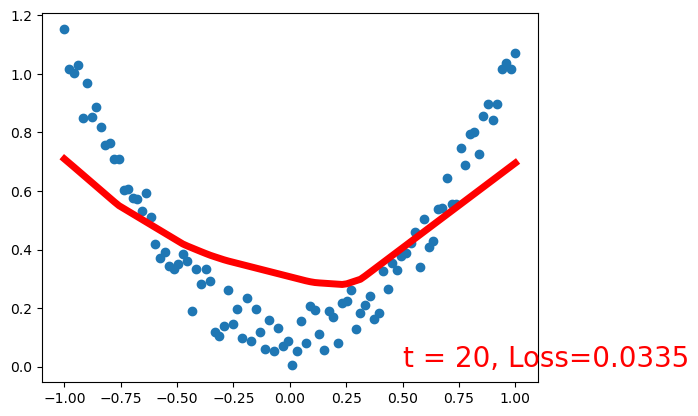

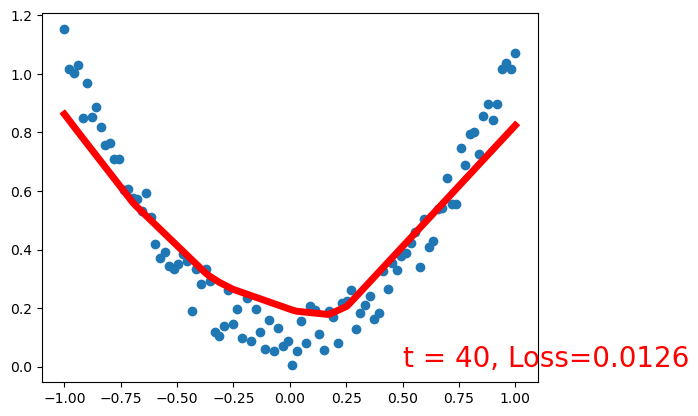

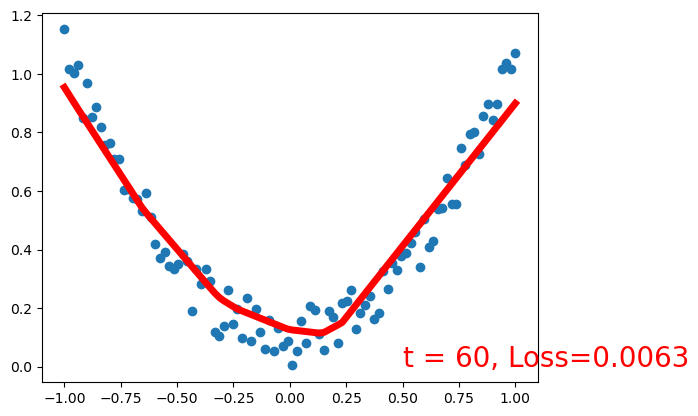

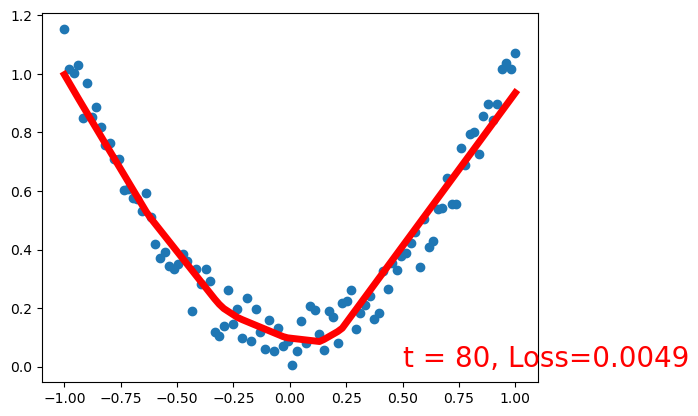

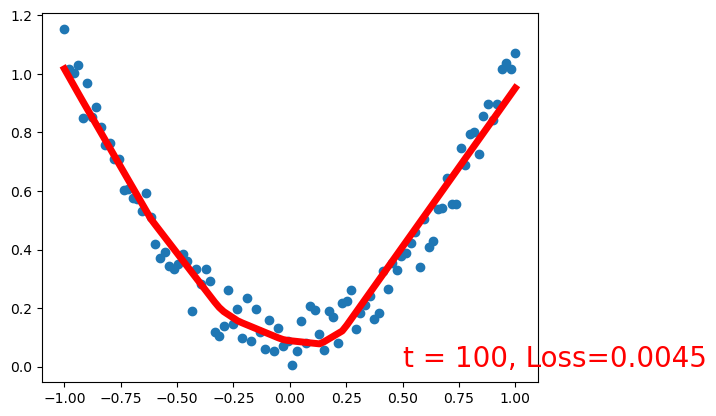

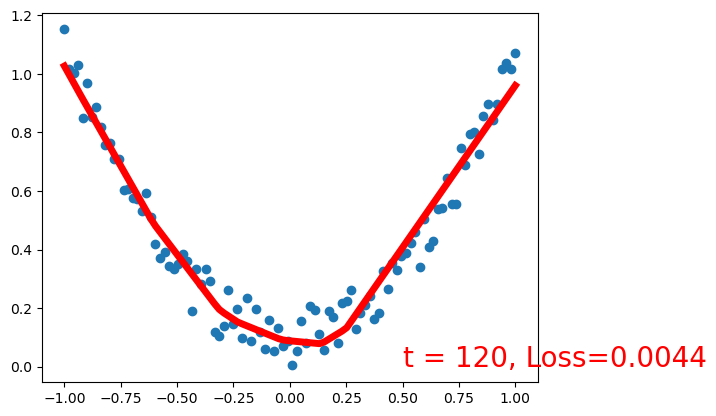

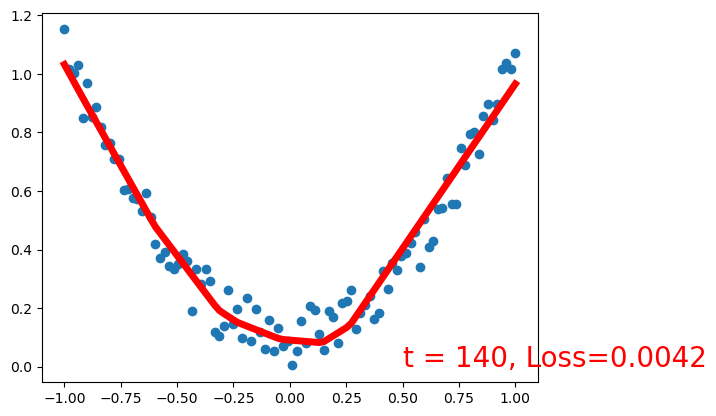

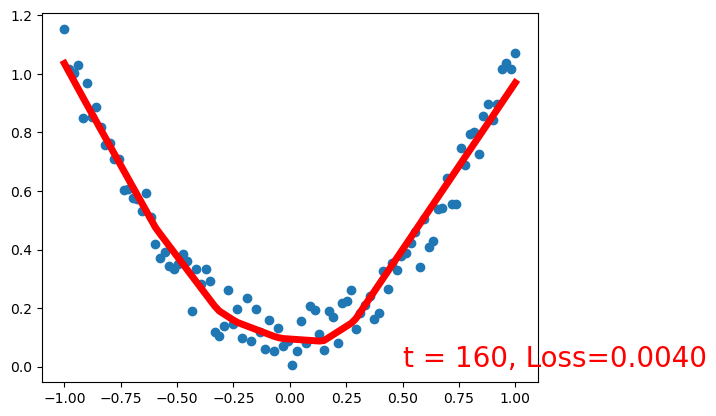

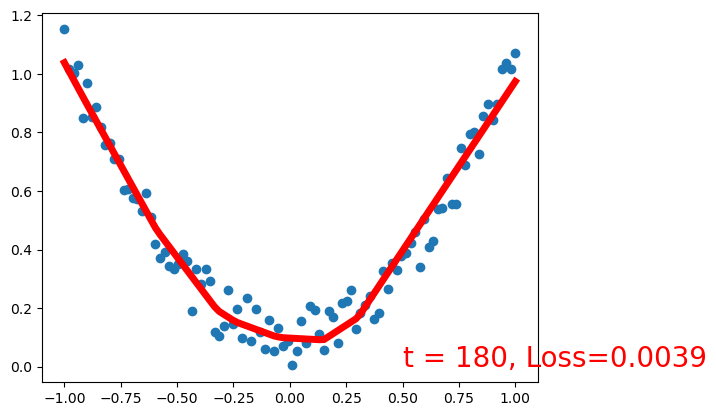

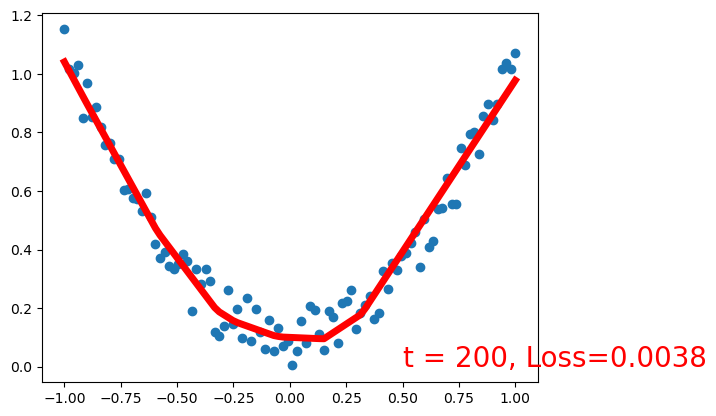

In [20]:
net = Net(n_feature=1, n_hidden=20, n_output=1)     # define the network
print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(201):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 20 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 't = %d, Loss=%.4f' % (t, loss.data.numpy()), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        plt.show()

plt.ioff()
# plt.show()